<a href="https://colab.research.google.com/github/jj535/Flixster/blob/master/MikeJeongTAKEHOME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm - Spring 2023

## Problem 1: Take-at-home  (45 points total)

You are applying for a position at the data science team of USDA and you are given data associated with determining appropriate parasite treatment of canines. The suggested treatment options are determined based on a **logistic regression** model that predicts if the canine is infected with a parasite. 

The data is given in the site: https://data.world/ehales/grls-parasite-study/workspace/file?filename=CBC_data.csv  and more specifically in the CBC_data.csv file. Login using you University Google account to access the data and the description that includes a paper on the study (**you dont need to read the paper to solve this problem**). Your target variable $y$ column is titled `parasite_status`. 




### Question 1 - Feature Engineering (5 points)

In this step you outline the following as potential features (this is a limited example - we can have many features as in your programming exercise below). 

Write the posterior probability expressions for logistic regression for the problem you are given to solve.

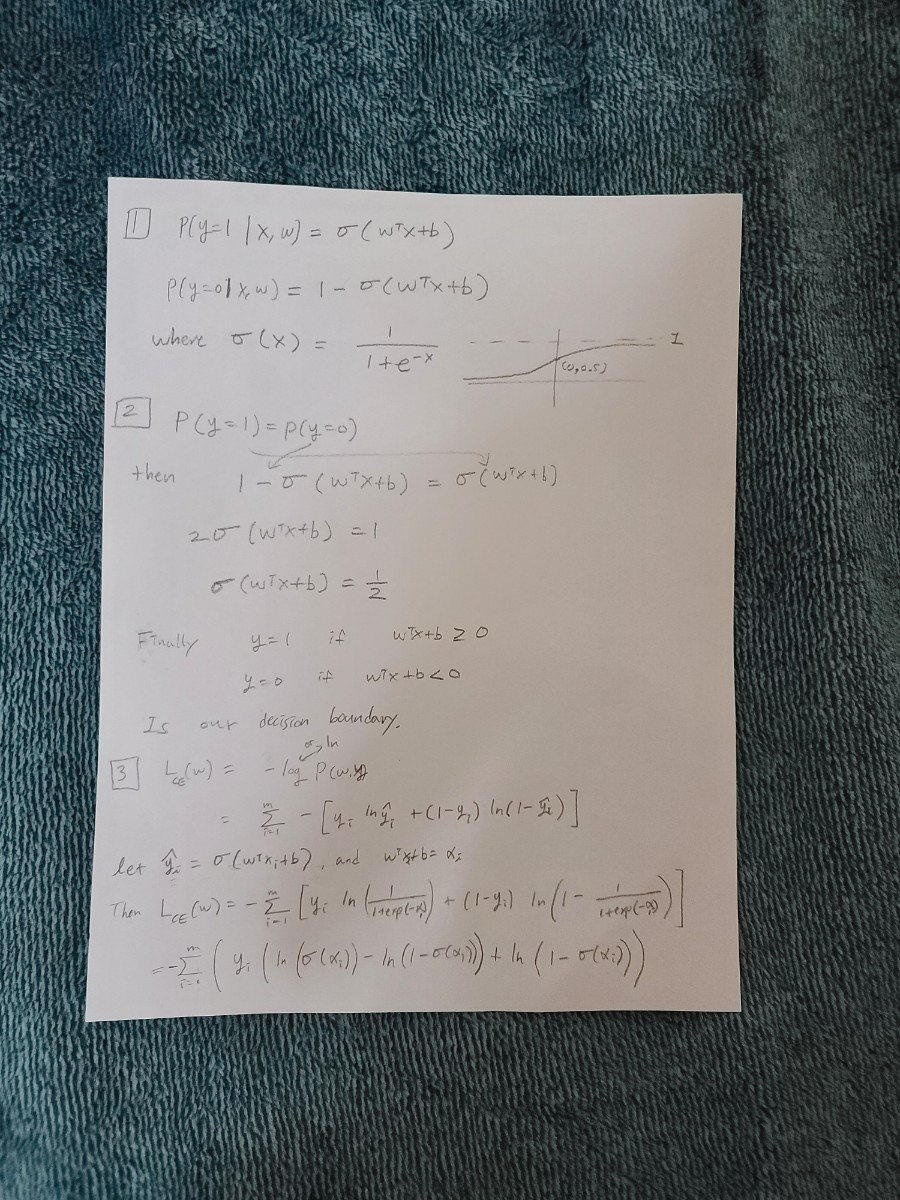

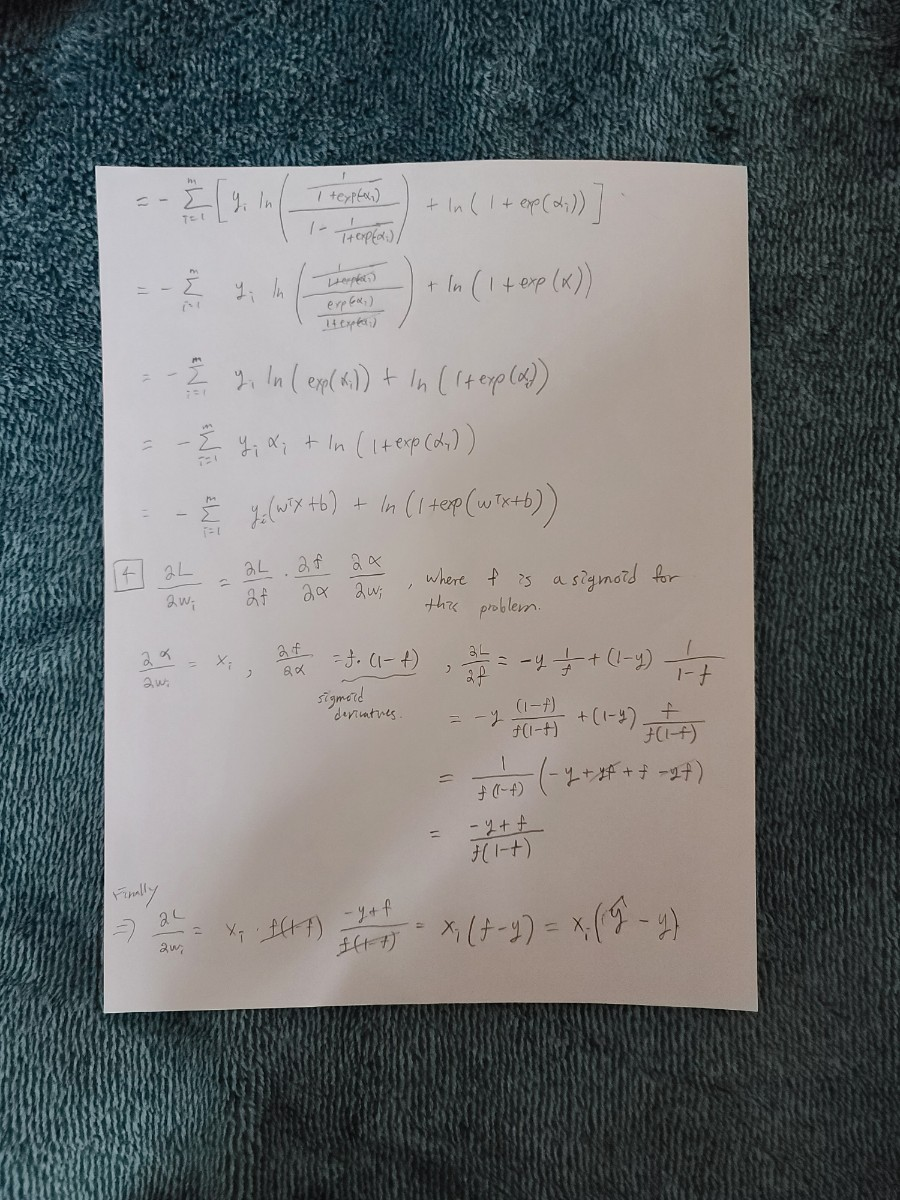

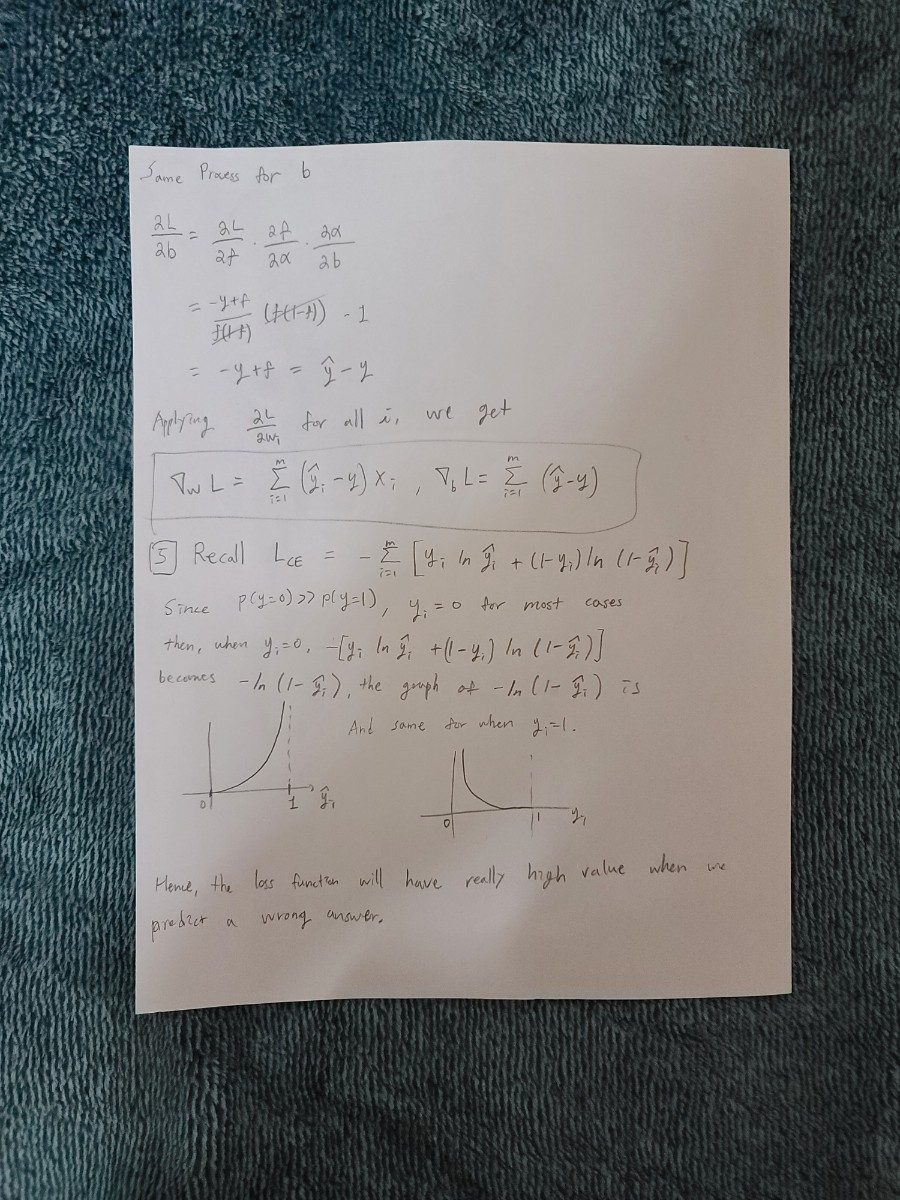

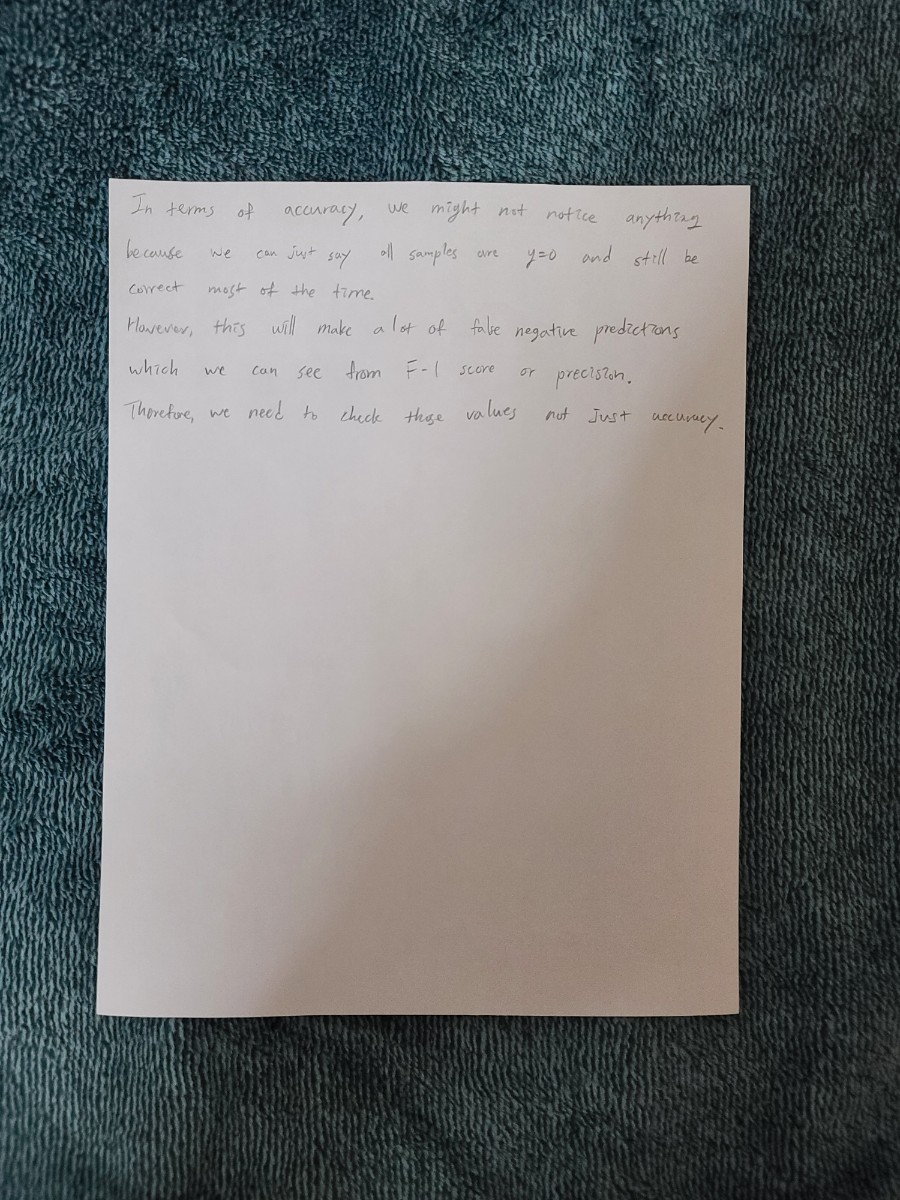



### Question 2 - Decision Boundary (5 points)

Write the expression for the decision boundary assuming that $p(y=1)=p(y=0)$. The decision boundary is the line that separates the two classes.







### Question 3 - Loss function (5 points)

Write the expression of the loss as a function of $\mathbf w$ that makes sense for you to use in this problem. 

NOTE: The loss will be a function that will include this function: 

$$\sigma(x) = \frac{1}{1+e^{-x}}$$


$$\sigma'(x) = \sigma(x) (1-\sigma(x))$$


### Question 4 - Gradient (5 points)

Write the expression of the gradient of the loss with respect to the parameters - show all your work.



$$ \nabla_\mathbf w L_{CE} = $$

### Question 5 - Imbalanced dataset (10 points)

You are now told that in the dataset  

$$p(y=0) >> p(y=1)$$

Can you comment if the accuracy of Logistic Regression will be affected by such imbalance?




### Question 6 - SGD (15 points)

The interviewer was impressed with your answers and wants to test your programming skills. 

1. Use the dataset to train a logistic regressor that will predict the target variable $y$. 

 2. Report the harmonic mean of precision (p) and recall (r) i.e the  [metric called $F_1$ score](https://en.wikipedia.org/wiki/F-score) that is calculated as shown below using a test dataset that is 20% of each group. Plot the $F_1$ score vs the iteration number  $t$. 

$$F_1 = \frac{2}{r^{-1} + p^{-1}}$$

Your code includes hyperparameter optimization of the learning rate and mini batch size. Please learn about cross validation which is a splitting strategy for tuning models [here](https://scikit-learn.org/stable/modules/cross_validation.html).

You are allowed to use any library you want to code this problem.



In [118]:
# write your code here
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


df = pd.read_csv('/content/CBC_data.csv')  
df = df.dropna()
df.head(10)

,ID,SEX,TYPEAREA,SEX.REPRO,REPRO.STATUS,AGE,PARASITE_STATUS,RBC,HGB,WBC,EOS.CNT,MONO.CNT,NUT.CNT,PL.CNT,LYMP.CNT
0,grls5ZUT2BYY,Male,Suburban,IntactMale,Intact,9,Negative,6.4,16.6,14.2,142.0,852.0,6390.0,210.0,6816.0
1,grls8DCONYUU,Female,Rural,NeuteredFemale,Neutered,6,Negative,4.8,12.5,10.0,400.0,300.0,4800.0,209.0,4500.0
2,grlsUC5R4PTT,Male,Suburban,IntactMale,Intact,14,Negative,6.2,17.3,9.5,190.0,475.0,7315.0,164.0,1520.0
3,grlsXUR2PY88,Male,Rural,IntactMale,Intact,6,Negative,5.4,13.8,14.1,1692.0,423.0,7755.0,254.0,4230.0
4,grlsTBZUF3GG,Female,Rural,IntactFemale,Intact,18,Negative,5.9,14.4,6.5,390.0,130.0,2795.0,213.0,3185.0
5,grls3V6P5EEE,Male,Suburban,IntactMale,Intact,17,Negative,5.8,16.0,6.1,122.0,183.0,4026.0,194.0,1769.0
6,grlsQHPLBW22,Male,Rural,IntactMale,Intact,5,Negative,5.2,13.8,9.1,637.0,455.0,3913.0,433.0,4095.0
7,grlsS99HCF44,Male,Suburban,IntactMale,Intact,9,Positive,5.8,14.7,13.9,139.0,417.0,7089.0,334.0,6255.0
8,grls2IS89WTT,Female,Suburban,IntactFemale,Intact,16,Negative,7.0,18.0,10.4,104.0,936.0,5616.0,264.0,3744.0
9,grlsK5CWL6FF,Female,Suburban,NeuteredFemale,Neutered,16,Negative,5.2,14.7,8.2,410.0,246.0,3608.0,155.0,3936.0


In [119]:
X = df.drop(["ID", "PARASITE_STATUS"], axis=1)
label_encoder = LabelEncoder()
X['SEX'] = label_encoder.fit_transform(X['SEX'])



label_encoder1 = LabelEncoder()
X['SEX.REPRO'] = label_encoder1.fit_transform(X['SEX.REPRO'])

label_encoder2 = LabelEncoder()
X['REPRO.STATUS'] = label_encoder2.fit_transform(X['REPRO.STATUS'])

label_encoder3 = LabelEncoder()
X['TYPEAREA'] = label_encoder3.fit_transform(X['TYPEAREA'])

X['HGB'] = X['HGB'] / X['HGB'].abs().max()
X['AGE'] = X['AGE'] / X['AGE'].abs().max()
X['WBC'] = X['WBC'] / X['WBC'].abs().max()
X["RBC"] = X["RBC"] / X["RBC"].abs().max()
X["EOS.CNT"] = X["EOS.CNT"] / X["EOS.CNT"].abs().max()
X["MONO.CNT"] = X["MONO.CNT"] / X["MONO.CNT"].abs().max()
X["PL.CNT"] = X["PL.CNT"] / X["PL.CNT"].abs().max()
X["LYMP.CNT"] = X["LYMP.CNT"] / X["LYMP.CNT"].abs().max()

X.head(10)

,SEX,TYPEAREA,SEX.REPRO,REPRO.STATUS,AGE,RBC,HGB,WBC,EOS.CNT,MONO.CNT,NUT.CNT,PL.CNT,LYMP.CNT
0,1,1,1,0,0.236842,0.771084,0.817734,0.531835,0.044154,0.443750,6390.0,0.374332,0.713867
1,0,0,2,1,0.157895,0.578313,0.615764,0.374532,0.124378,0.156250,4800.0,0.372549,0.471303
2,1,1,1,0,0.368421,0.746988,0.852217,0.355805,0.059080,0.247396,7315.0,0.292335,0.159196
3,1,0,1,0,0.157895,0.650602,0.679803,0.528090,0.526119,0.220312,7755.0,0.452763,0.443025
4,0,0,0,0,0.473684,0.710843,0.709360,0.243446,0.121269,0.067708,2795.0,0.379679,0.333578
5,1,1,1,0,0.447368,0.698795,0.788177,0.228464,0.037935,0.095312,4026.0,0.345811,0.185274
6,1,0,1,0,0.131579,0.626506,0.679803,0.340824,0.198072,0.236979,3913.0,0.771836,0.428886
7,1,1,1,0,0.236842,0.698795,0.724138,0.520599,0.043221,0.217188,7089.0,0.595365,0.655111
8,0,1,0,0,0.421053,0.843373,0.886700,0.389513,0.032338,0.487500,5616.0,0.470588,0.392124
9,0,1,2,1,0.421053,0.626506,0.724138,0.307116,0.127488,0.128125,3608.0,0.276292,0.412233


In [120]:
Y = df["PARASITE_STATUS"].replace({"Negative": 0, "Positive": 1})
Y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: PARASITE_STATUS, dtype: int64

In [134]:
def pred(w, x, b):
  a = np.dot(w,x) + b 
  y_hat = 1/(1 + np.exp(-a))
  return y_hat[0]



def SGD(x_train, y_train, x_test, y_test, learning_rate, batch_size, epoch):
  w = [0] * x_train.shape[1]
  w = np.array(w)
  b = [0]
  b = np.array(b)
  for _ in range(epoch):
    idx = np.random.choice(x_train.shape[0], replace = False, size = batch_size)
    for i in idx:
      x_ = np.array(x_train.iloc[i])
      y_ = y_train.iloc[i]
      y_hat = pred(w, x_, b)

      #print(x_, y_)

      w = w - (learning_rate * ((y_hat - y_) * x_))
      b = b - learning_rate * (y_hat - y_)
      #print(np.dot(w,x_), max(w), max(x_))
      #print(y_hat, y_)
      #print("_____")
  
  y_pred = [pred(w, x_i, b) for x_i in x_test.to_numpy()]
  print(y_pred)
  f1 = f1_score(y_test, y_pred)

  return f1

In [122]:


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
y_train.shape

(2395,)

In [123]:
x_train

,SEX,TYPEAREA,SEX.REPRO,REPRO.STATUS,AGE,RBC,HGB,WBC,EOS.CNT,MONO.CNT,NUT.CNT,PL.CNT,LYMP.CNT
1252,0,1,2,1,0.578947,0.795181,0.827586,0.299625,0.049751,0.125000,4160.0,0.313725,0.360285
2349,0,0,0,0,0.289474,0.686747,0.684729,0.449438,0.149254,0.250000,7560.0,0.527629,0.364474
1686,1,1,1,0,0.289474,0.795181,0.733990,0.374532,0.124378,0.208333,5700.0,0.472371,0.366569
2202,1,0,1,0,0.289474,0.722892,0.729064,0.490637,0.162935,0.272917,8384.0,0.459893,0.370444
854,1,0,1,0,0.263158,0.783133,0.783251,0.513109,0.170398,0.214062,9453.0,0.438503,0.344365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,1,1,1,0,0.210526,0.722892,0.699507,0.307116,0.076493,0.128125,4920.0,0.442068,0.291998
2456,1,2,3,1,0.368421,0.771084,0.807882,0.389513,0.000000,0.650000,6552.0,0.349376,0.272308
1793,1,1,1,0,0.236842,0.686747,0.714286,0.288390,0.047886,0.320833,3850.0,0.244207,0.322581
50,0,1,2,1,0.710526,0.710843,0.793103,0.258427,0.150187,0.107813,2898.0,0.409982,0.346879


In [135]:
# I am going to optimize my hyper parameters using gridsearchCV (kind of)
f1_max = 0
best_param = [0, 0]

for learning_rate in [1, 0.1, 0.01, 0.001, 0.0001]:
  for batch_size in [2**i for i in range(2, 8, 2)]:
    ans = SGD(x_train, y_train, x_test, y_test, learning_rate, batch_size, 10)
    if ans > f1_max:
      best_param = [learning_rate, batch_size]


print("Best learning rate, batch size, and f1 score")
print(best_param, f1_max)

<ipython-input-134-6f1c86883289>:3: RuntimeWarning: overflow encountered in exp
  y_hat = 1/(1 + np.exp(-a))
<ipython-input-134-6f1c86883289>:3: RuntimeWarning: overflow encountered in exp
  y_hat = 1/(1 + np.exp(-a))
<ipython-input-134-6f1c86883289>:3: RuntimeWarning: overflow encountered in exp
  y_hat = 1/(1 + np.exp(-a))


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

<ipython-input-134-6f1c86883289>:3: RuntimeWarning: overflow encountered in exp
  y_hat = 1/(1 + np.exp(-a))
<ipython-input-134-6f1c86883289>:3: RuntimeWarning: overflow encountered in exp
  y_hat = 1/(1 + np.exp(-a))
<ipython-input-134-6f1c86883289>:3: RuntimeWarning: overflow encountered in exp
  y_hat = 1/(1 + np.exp(-a))
<ipython-input-134-6f1c86883289>:3: RuntimeWarning: overflow encountered in exp
  y_hat = 1/(1 + np.exp(-a))
<ipython-input-134-6f1c86883289>:3: RuntimeWarning: overflow encountered in exp
  y_hat = 1/(1 + np.exp(-a))


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

<ipython-input-134-6f1c86883289>:3: RuntimeWarning: overflow encountered in exp
  y_hat = 1/(1 + np.exp(-a))
<ipython-input-134-6f1c86883289>:3: RuntimeWarning: overflow encountered in exp
  y_hat = 1/(1 + np.exp(-a))
<ipython-input-134-6f1c86883289>:3: RuntimeWarning: overflow encountered in exp
  y_hat = 1/(1 + np.exp(-a))
<ipython-input-134-6f1c86883289>:3: RuntimeWarning: overflow encountered in exp
  y_hat = 1/(1 + np.exp(-a))


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

<ipython-input-134-6f1c86883289>:3: RuntimeWarning: overflow encountered in exp
  y_hat = 1/(1 + np.exp(-a))
<ipython-input-134-6f1c86883289>:3: RuntimeWarning: overflow encountered in exp
  y_hat = 1/(1 + np.exp(-a))


ValueError: ignored